Exercise for Graph Ill
Your task:
1. Accept a user's name, age, and a list of their skills.
2. Pass the state through three nodes that:
First node: Personalizes the name field with a greeting.
• Second node: Describes the user's age.
• Third node: Lists the user's skills in a formatted string.
3. The final output in the result field should be a combined message in this format:
Output: "Linda, welcome to the system! You are 31 years old! You have skills in: Python Machine Learning, and LangGraph"

In [43]:
%pip install langgraph
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

Note: you may need to restart the kernel to use updated packages.


In [44]:
class AgentState(TypedDict):
    name: str
    age: str
    skills : list
    final_result: str

In [45]:
def first_node(state:AgentState) -> AgentState:
    """This node will greet the user"""

    state["final_result"] = f"{state["name"]} welcome to the system!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This node will describe the user's age"""

    state["final_result"] = state["final_result"] + f" You are {state["age"]} years old!"
    return state


def third_node(state:AgentState) -> AgentState:
    """This node will list the user's skills in a formatted string"""
    state["final_result"] = state["final_result"] + f" You have skills in: {", ".join(state["skills"])}"

    return state

In [46]:
graph = StateGraph(AgentState)

graph.add_node("personalize", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skills_description", third_node)

graph.set_entry_point("personalize")
graph.add_edge("personalize", "age_description")
graph.add_edge("age_description", "skills_description")
graph.set_finish_point("skills_description")
app = graph.compile()

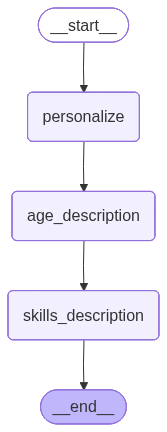

In [47]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [48]:
result = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})

In [49]:
result["final_result"]

'Linda welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'